In [51]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
from gpt.gpt import GPT

In [74]:
 G = GPT(input_file='/Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/dcgun/gpt.in',
        workdir='/Users/colwyngulliford/Documents/GitHub/lume-gpt/devel/test')


In [79]:
from gpt import parsers
parsers.set_support_files(G.input['lines'],'/Users/colwyngulliford/Documents/GitHub/lume-gpt/devel/test',verbose=True)

Set path to file:  setfile("beam", "/Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/dcgun/gpt_particles.gdf");
Set path to file:  Map2D_E("wcs", "z", Zdcgun, "/Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/dcgun/fields/gun_0mm.gdf", "R", "Z", "Er", "Ez", Edcgun);
Set path to file:  Map2D_B("wcs", XSLA01,YSLA01,ZSLA01,  cos(THXSLA01),0,sin(THXSLA01), 0,1,0, "/Users/colwyngulliford/Documents/GitHub/lume-gpt/templates/dcgun/fields/solenoid_SLA_L60.gdf", "R", "Z", "Br", "Bz", BSLA01);


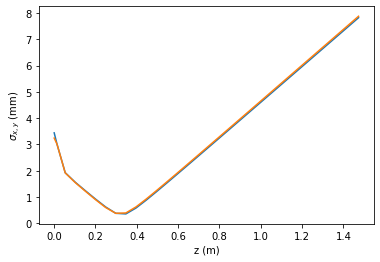

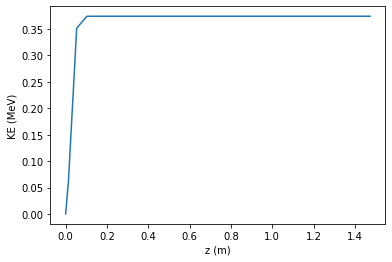

In [78]:
# Run GPT with some new settings:
from matplotlib import pyplot as plt

G.set_variables({'gun_voltage':375,'sol_1_current':-1})
G.run()

zavg = [tout['z'].mean() for tout in G.tout] 
xstd = [1000*tout['x'].std() for tout in G.tout] 
ystd = [1000*tout['y'].std() for tout in G.tout] 
avgKE = [0.51*(tout['G'].mean()-1) for tout in G.tout] 

plt.figure()
plt.plot(zavg,xstd, zavg,ystd)
plt.xlabel('z (m)')
plt.ylabel('$\sigma_{x,y}$ (mm)')

plt.figure()
plt.plot(zavg,avgKE)
plt.xlabel('z (m)')
plt.ylabel('KE (MeV)')
plt.show()